# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

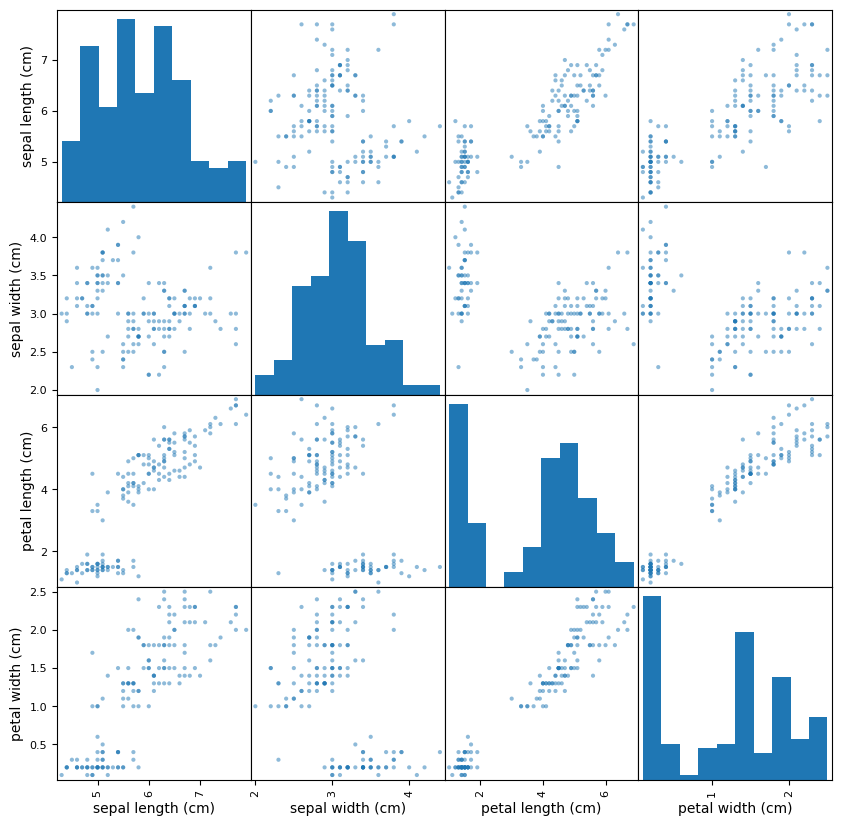

In [21]:
# import
import pandas as pd
from pandas.plotting import scatter_matrix

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# plot
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


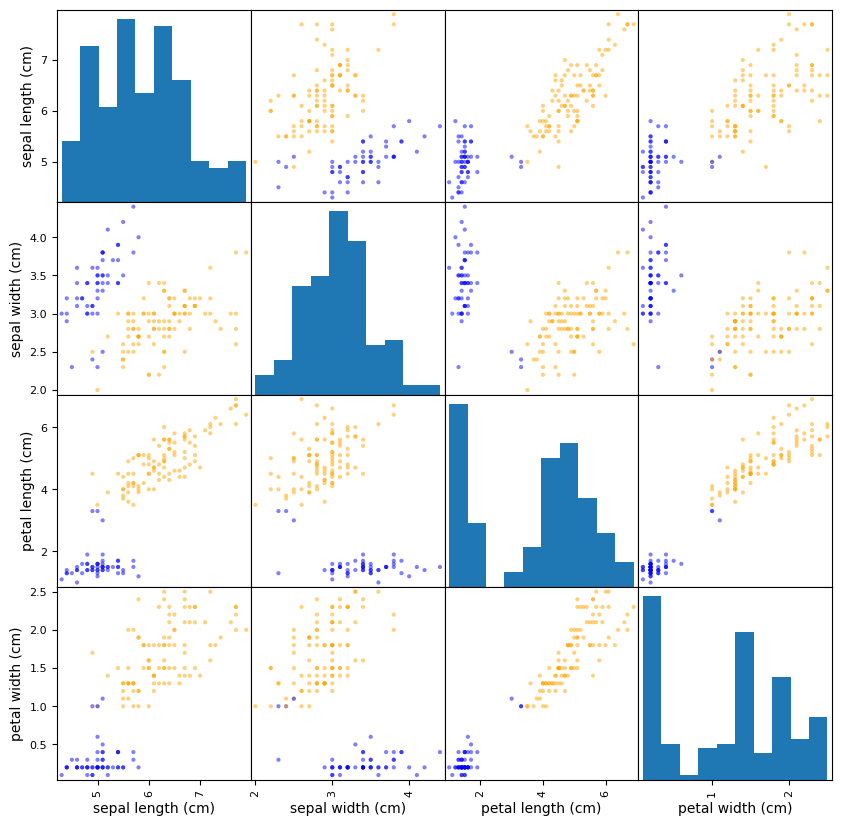

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


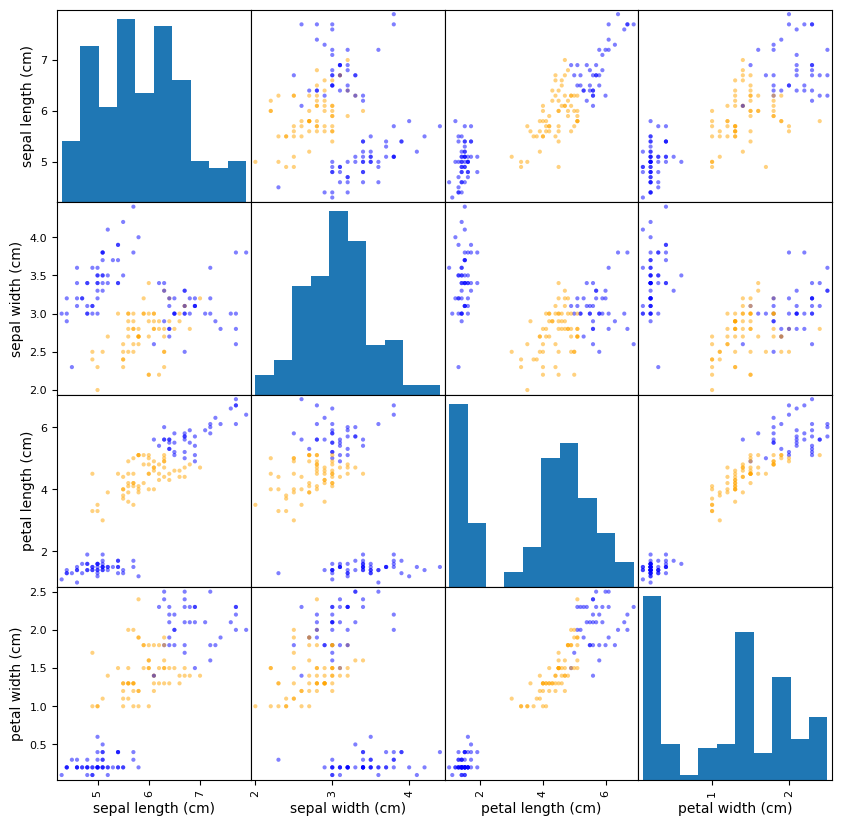

In [22]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans2.fit(iris.data)
clusters2 = kmeans2.labels_
print(clusters2)

# Assign colors
colors2 = []
for c in clusters2:
    if c == 0:
        colors2.append('orange')
    else:
        colors2.append('blue')
        
# plot
pd.plotting.scatter_matrix(df, figsize=(10,10), color = colors2)
plt.show()


# repeat with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans3.fit(iris.data)
clusters3 = kmeans3.labels_
print(clusters3)

# Assign colors
colors3 = []
for c in clusters3:
    if c == 0:
        colors3.append('orange')
    else:
        colors3.append('blue')
        
# plot
pd.plotting.scatter_matrix(df, figsize=(10,10), color = colors3)
plt.show()



*Complete*
From the pair plots with KMeans clustering, I can see that petal length and petal width are most strongly corelated with the cluster assignments. Points are mosre separated along those axes compared to the sepal features.
These features show clear separation between clusters in the pair plots when using 2 or 3 clusters, while sepal length and width show much more overlap between clusters.

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


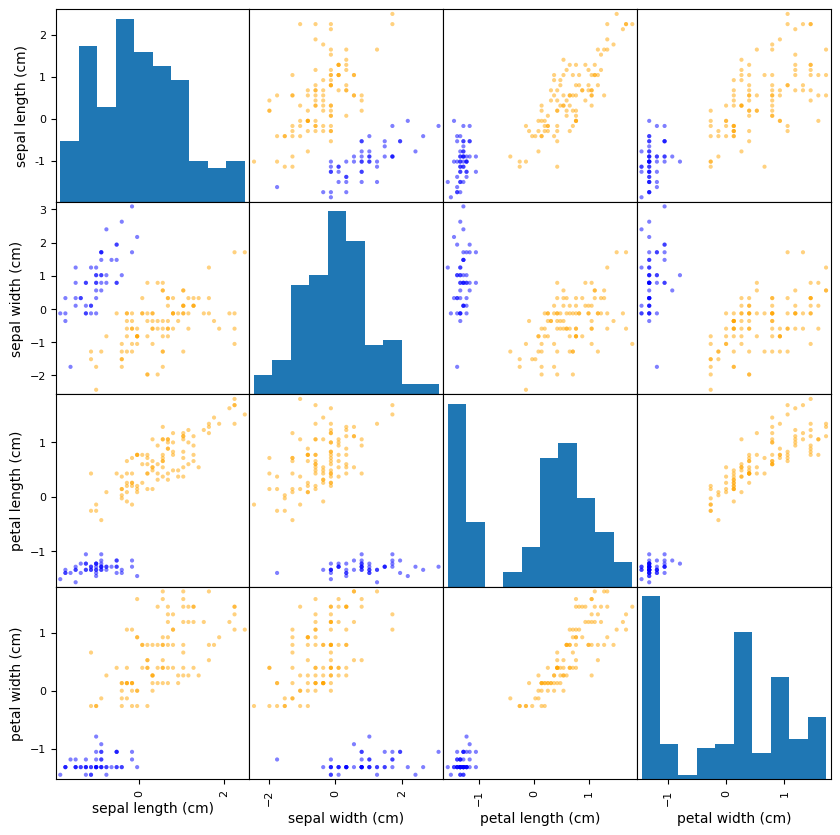

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


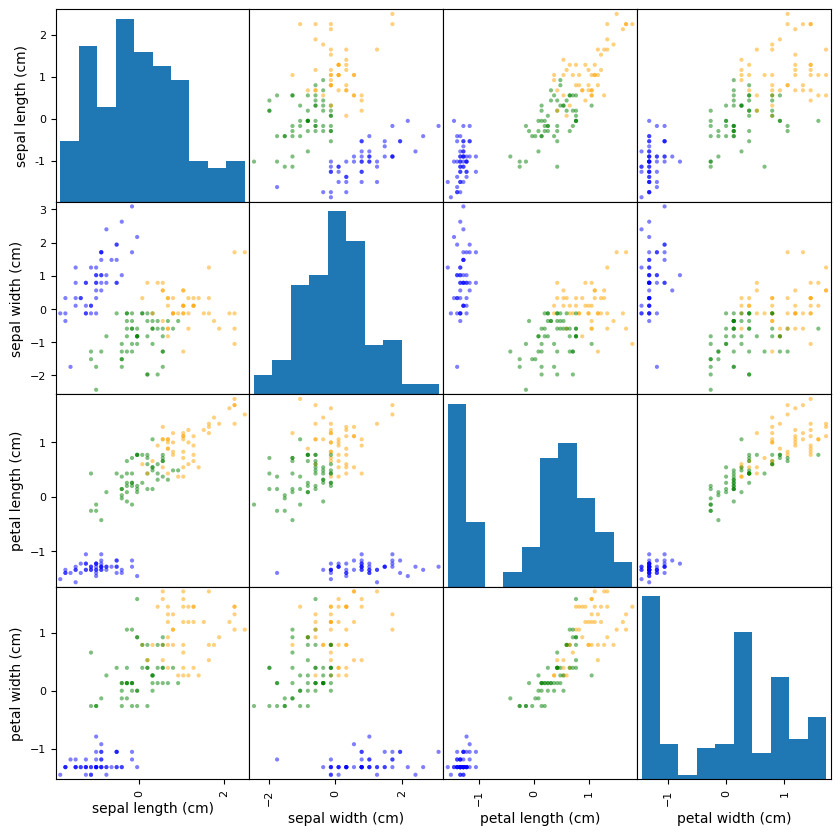

In [25]:
from sklearn.preprocessing import StandardScaler

# Scale features
df_scaled = pd.DataFrame(iris.data, columns=iris.feature_names)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Clustering
kmeans2_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters2_scaled = kmeans2_scaled.fit_predict(df_scaled)
df_scaled['cluster_2'] = clusters2_scaled
                         
print(clusters2_scaled)

# Assign colors
colors2 = []
for c in df_scaled['cluster_2']:
    if c == 0:
        colors2.append('orange')
    else:
        colors2.append('blue')
        
# plot
pd.plotting.scatter_matrix(df_scaled[iris.feature_names], figsize=(10,10), color = colors2)
plt.show()


# Cluster 3
kmeans3_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters3_scaled = kmeans3_scaled.fit_predict(df_scaled)
df_scaled['cluster_3'] = clusters3_scaled
                         
print(clusters3_scaled)

# Assign colors for 3 clusters
colors3 = []
for c in df_scaled['cluster_3']:
    if c == 0:
        colors3.append('orange')
    elif c == 1:
        colors3.append('blue')
    else:
        colors3.append('green')
        
# plot
pd.plotting.scatter_matrix(df_scaled[iris.feature_names], figsize=(10,10), color = colors3)
plt.show()

*Complete*
They look pretty similar before feature scaling. In this case, scaling did not significantly change the clustering results.

**Problem 2d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?  
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

[0.76106441 0.18974108]
0.9508054958606206


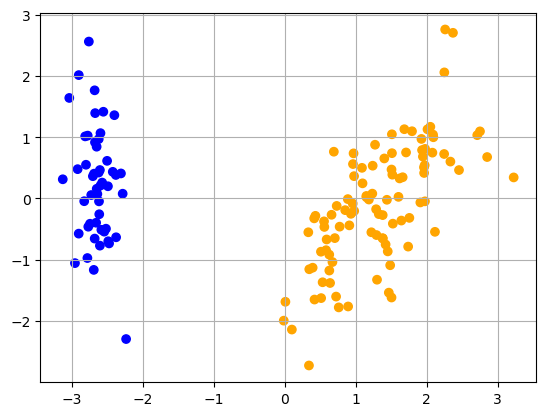

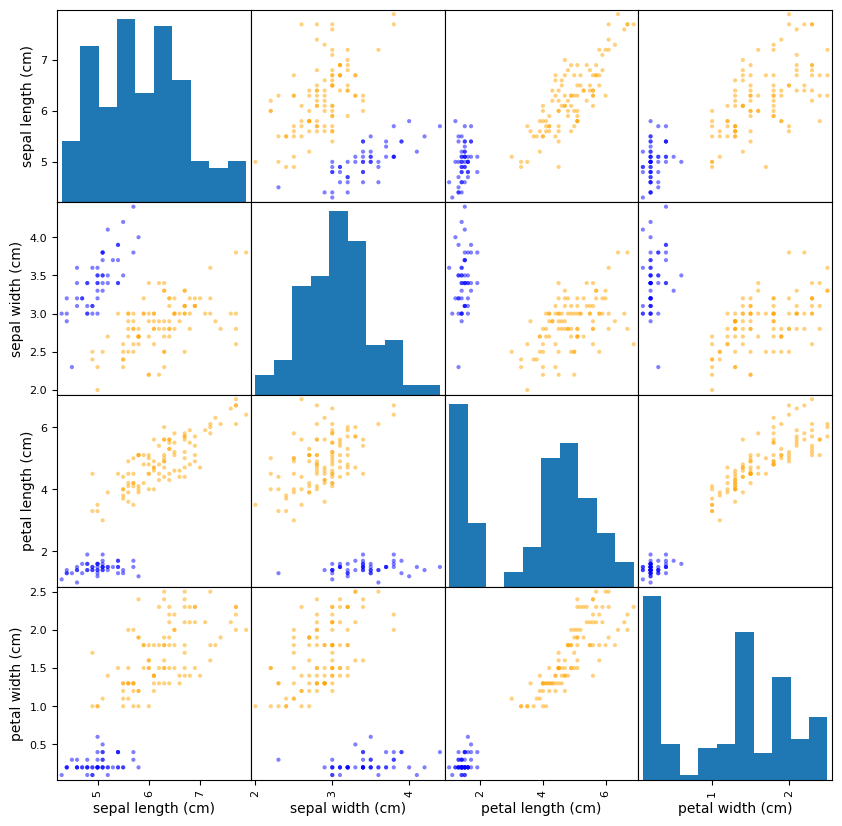

In [39]:
from sklearn.decomposition import PCA

scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Clustering
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# plot in PCA space
colors = ['orange' if c == 0 else 'blue' for c in clusters_pca]
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.grid(True)
plt.show()

# plot in feature space
df['cluster_pca'] = clusters_pca
color_orig = ['orange' if c == 0 else 'blue' for c in df['cluster_pca']]
pd.plotting.scatter_matrix(df[iris.feature_names], figsize=(10,10), color = color_orig)
plt.show()

*Complete*
It also looks similar to previous one. 
PCA provides a compact and informtive representation of the iris dataset that offers similar clustering performance to full-feature methods while being easier to visualize.

**Problem 2e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


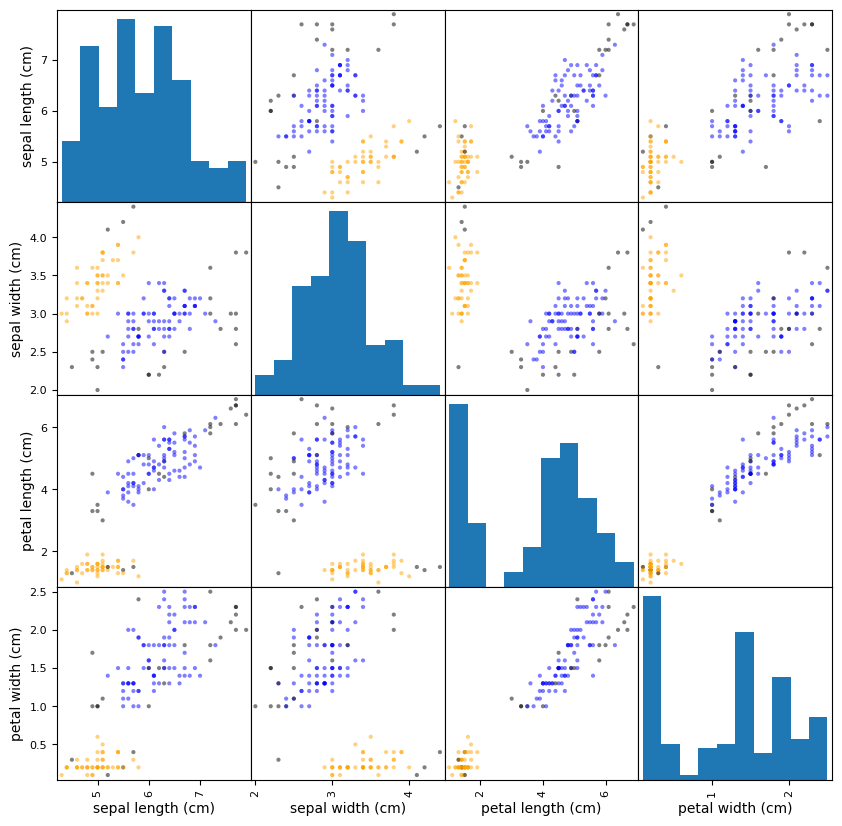

In [41]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_db = dbscan.fit_predict(scaled_features)

# Colors
colors_db = []
for label in labels_db:
    if label == -1:
        colors_db.append('black')
    elif label == 0:
        colors_db.append('orange')
    elif label == 1:
        colors_db.append('blue')
    else:
        colors_df.append('green')

# plot
df['DBSCAN_label'] = labels_db
pd.plotting.scatter_matrix(df[iris.feature_names], figsize=(10,10), color = colors_db)
plt.show()

*Complete*
DBSCAN identifies outliers while K-means assigns every point to a cluster. It offers more flexibility and robustness to noise but needs tuning. K-means is simpler amd cconsistent for clean, well-separated data.

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of 1$^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

<function matplotlib.pyplot.show(close=None, block=None)>

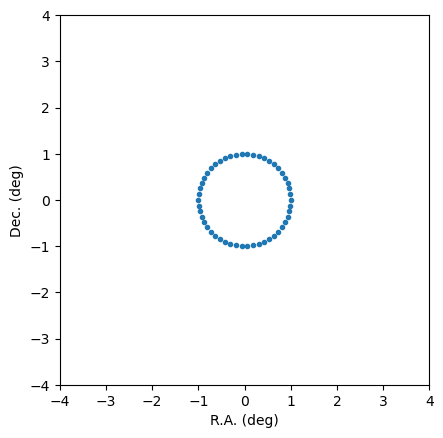

In [42]:
# generate data
N = 50
radius = 1.0
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
xx = radius * np.cos(theta)
yy = radius * np.sin(theta)

# plot
ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)
plt.show

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

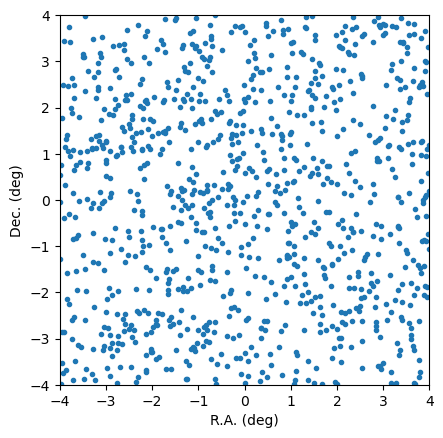

In [43]:
# generate data
N_random = 1000
xr = np.random.uniform(-4, 4, N_random)
yr = np.random.uniform(-4, 4, N_random)

# plot
ax = plt.axes(aspect='equal')
ax.plot(xr, yr, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)
plt.show()

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

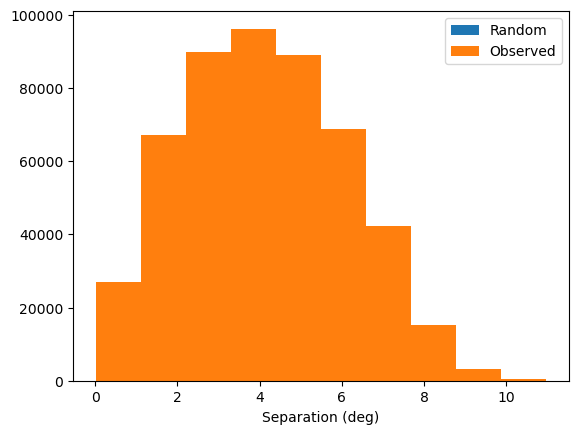

In [47]:
# calculate distances
coords_real = np.vstack([xx, yy]).T
coords_rand = np.vstack([xr, yr]).T

def pairwise_distances(coords):
    distances = []
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            distances.append(np.linalg.norm(coords[i] - coords[j]))
    return np.array(distances)

n_rand, bins, _ = plt.hist(pairwise_distances(coords_real), label='Random')
n_real, bins, _ = plt.hist(pairwise_distances(coords_rand), label='Observed')
plt.legend(loc='best')
plt.xlabel('Separation (deg)')
plt.show()

**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

Text(0, 0.5, 'Autocorrelation')

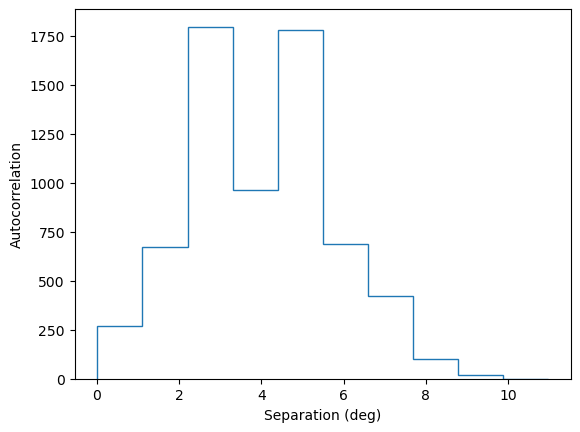

In [48]:
autocorr = (n_real / n_rand) - 1
plt.stairs(autocorr, bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')

*Complete*
From teh autocorrection analysis, I learned tha the large_scale structure in this portion of the sky is highly non-random. The significant peak in the two-point correction function at a separation of approximately 2 degrees shows a strong excess of galaxy pairs at the specific angular distance. It corresponds to the diameter of the observed circular structure.
The results implies that galaxies are not uniformly diatributed, but form a coherent or correlated structure.